In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [5]:
df = pd.read_csv("/home/ephym/Desktop/spam_detection/backend/datasets/spam.csv", encoding="latin-1")

In [6]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [7]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [8]:
df.shape

(5572, 5)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [11]:
df.isnull().sum()/df.shape[0]*100

v1             0.000000
v2             0.000000
Unnamed: 2    99.102656
Unnamed: 3    99.784637
Unnamed: 4    99.892319
dtype: float64

In [12]:
# df.dropna(inplace=True)

In [13]:
df.duplicated().sum()

np.int64(403)

In [14]:
# df.drop_duplicates(inplace=True)

In [15]:
for i in df.select_dtypes(include="object").columns:
  print(i)
  print(df[i].value_counts())
  print("***"*10)

v1
v1
ham     4825
spam     747
Name: count, dtype: int64
******************************
v2
v2
Sorry, I'll call later                                                                                                                                                                 30
I cant pick the phone right now. Pls send a message                                                                                                                                    12
Ok...                                                                                                                                                                                  10
Wen ur lovable bcums angry wid u, dnt take it seriously.. Coz being angry is d most childish n true way of showing deep affection, care n luv!.. kettoda manda... Have nice day da.     4
Okie                                                                                                                                                             

In [16]:
df.describe().T

,count,unique,top,freq
v1,5572,2,ham,4825
v2,5572,5169,"Sorry, I'll call later",30
Unnamed: 2,50,43,"bt not his girlfrnd... G o o d n i g h t . . .@""",3
Unnamed: 3,12,10,"MK17 92H. 450Ppw 16""",2
Unnamed: 4,6,5,"GNT:-)""",2


In [17]:
df = df.iloc[:, :2]
df.columns = ["label", "message"]
df.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df["label"] = df["label"].map({"ham": 0, "spam": 1})
df.head()

,label,message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [19]:
df['message'] = df['message'].str.lower()

In [20]:
df['message'] = df['message'].apply(lambda x: re.sub(f"[{string.punctuation}]", "", x))

In [21]:
df['message'] = df['message'].apply(lambda x: re.sub(r'\d+', '', x))

In [22]:
df['message'] = df['message'].apply(lambda x: " ".join(x.split()))

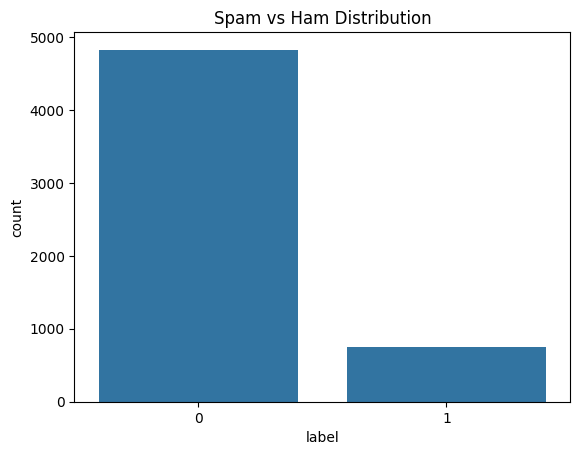

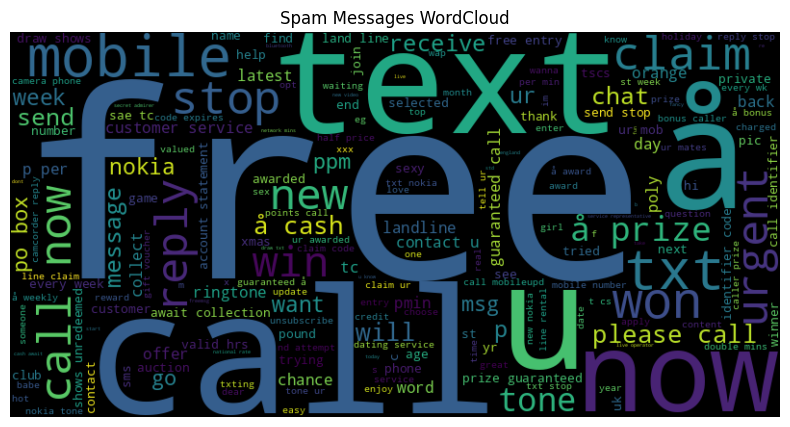

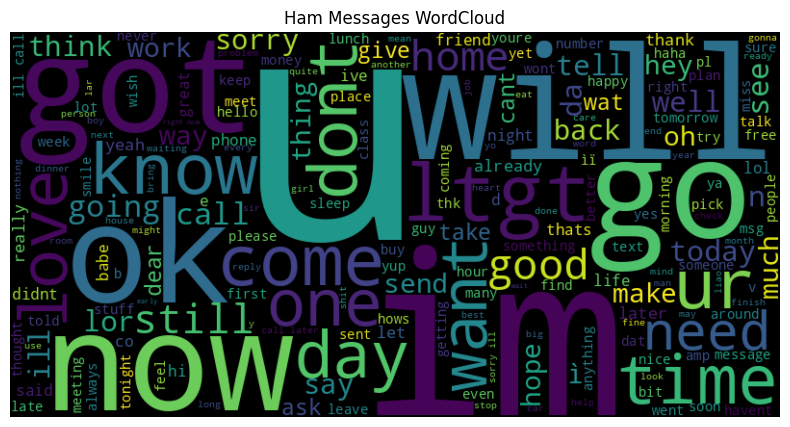

Count Vectorizer Shape: (5572, 8293)
TF-IDF Vectorizer Shape: (5572, 8293)


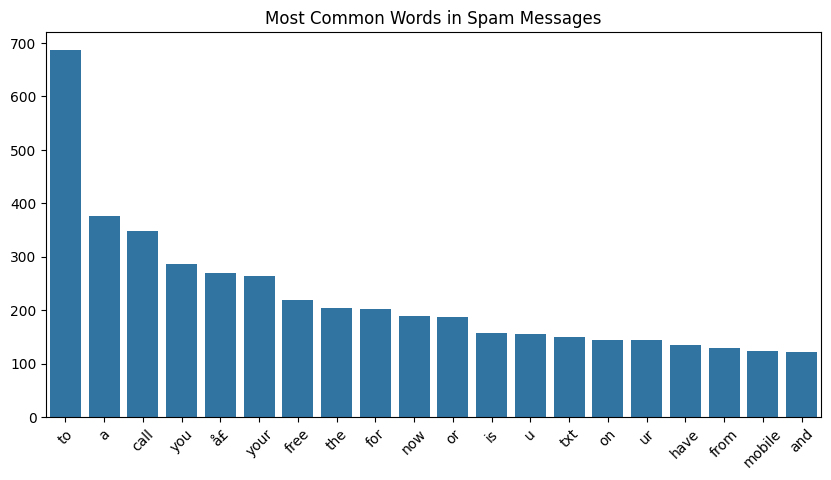

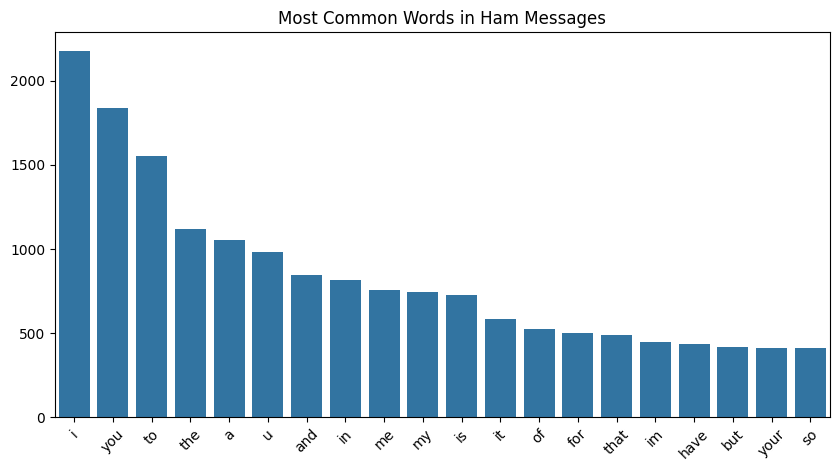

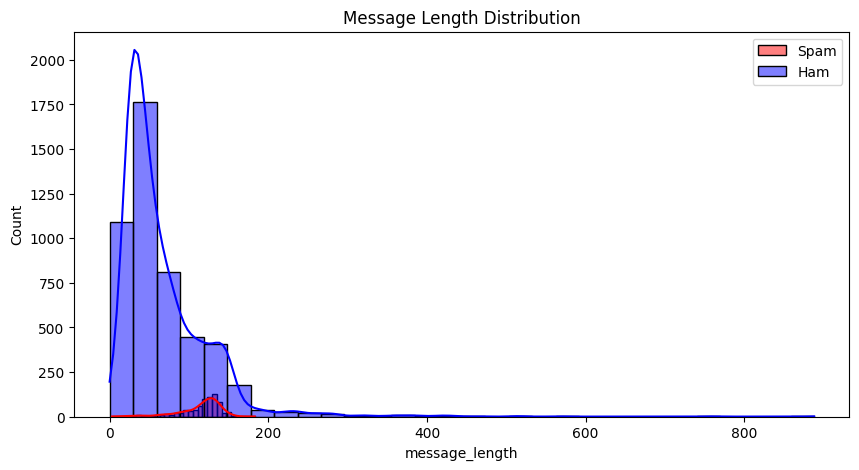

In [23]:
# Visualizing class distribution
sns.countplot(x='label', data=df)
plt.title('Spam vs Ham Distribution')
plt.show()

# WordCloud visualization of spam messages
spam_words = " ".join(df[df['label'] == 1]['message'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(spam_words)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Spam Messages WordCloud')
plt.show()

# WordCloud visualization of ham messages
ham_words = " ".join(df[df['label'] == 0]['message'])
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(ham_words)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Ham Messages WordCloud')
plt.show()

# Tokenization using CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
X_counts = vectorizer.fit_transform(df['message'])
print("Count Vectorizer Shape:", X_counts.shape)

# TF-IDF Vectorization
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
X_tfidf = tfidf_vectorizer.fit_transform(df['message'])
print("TF-IDF Vectorizer Shape:", X_tfidf.shape)

# Displaying most common words in spam messages
spam_corpus = []
for msg in df[df['label'] == 1]['message']:
    spam_corpus.extend(msg.split())
from collections import Counter
spam_counter = Counter(spam_corpus)
most_common_spam = spam_counter.most_common(20)

# Plot most common spam words
plt.figure(figsize=(10,5))
sns.barplot(x=[word[0] for word in most_common_spam], y=[word[1] for word in most_common_spam])
plt.xticks(rotation=45)
plt.title('Most Common Words in Spam Messages')
plt.show()

# Displaying most common words in ham messages
ham_corpus = []
for msg in df[df['label'] == 0]['message']:
    ham_corpus.extend(msg.split())
ham_counter = Counter(ham_corpus)
most_common_ham = ham_counter.most_common(20)

# Plot most common ham words
plt.figure(figsize=(10,5))
sns.barplot(x=[word[0] for word in most_common_ham], y=[word[1] for word in most_common_ham])
plt.xticks(rotation=45)
plt.title('Most Common Words in Ham Messages')
plt.show()

# Check for message length distribution
df['message_length'] = df['message'].apply(len)
plt.figure(figsize=(10,5))
sns.histplot(df[df['label'] == 1]['message_length'], color='red', label='Spam', kde=True, bins=30)
sns.histplot(df[df['label'] == 0]['message_length'], color='blue', label='Ham', kde=True, bins=30)
plt.legend()
plt.title('Message Length Distribution')
plt.show()

In [24]:
df

,label,message,message_length
0,0,go until jurong point crazy available only in ...,102
1,0,ok lar joking wif u oni,23
2,1,free entry in a wkly comp to win fa cup final ...,121
3,0,u dun say so early hor u c already then say,43
4,0,nah i dont think he goes to usf he lives aroun...,59
...,...,...,...
5567,1,this is the nd time we have tried contact u u ...,129
5568,0,will ì b going to esplanade fr home,35
5569,0,pity was in mood for that soany other suggestions,49
5570,0,the guy did some bitching but i acted like id ...,124


In [29]:
# print(vectorizer.get_feature_names())

In [30]:
from sklearn.model_selection import train_test_split

In [31]:
X_train,X_test,y_train,y_test  = train_test_split(df.message,df.label,test_size=0.2)

In [34]:
X_test

467                  when are you going to ride your bike
2721           im working technical support voice process
1016    free for st week no nokia tone ur mob every we...
2741    i dont know u and u dont know me send chat to ...
3857                                r u still working now
                              ...                        
2544    she is our sister she belongs our family she i...
1380                               i dnt wnt to tlk wid u
612                                i have many dependents
4133    is it your yahoo boys that bring in the perf o...
3396                         heehee that was so funny tho
Name: message, Length: 1115, dtype: object

In [40]:
from sklearn.feature_extraction.text import CountVectorizer

V =  CountVectorizer()

X_train_count = V.fit_transform(X_train.values)

X_train_count.toarray()[:3]




array([0, 0, 0, ..., 0, 0, 0], shape=(7558,))

In [41]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()

model.fit(X_train_count,y_train)

MultinomialNB()

In [45]:
##some testing

emails = [
    "Congratulations! You've won a $1,000 gift card. Click here to claim your prize now!",  # Spam
    "Hello John, I hope you're doing well. Let's schedule a meeting for next week."  # Not spam
]

emails_count = V.transform(emails)
model.predict(emails_count)

array([1, 0])

In [47]:
#check the score

X_test_count = V.transform(X_test)
model.score(X_test_count,y_test)

0.9820627802690582